# Exploring the data
Unit 2 / Lesson 1 / Assignment 4

### Exploring the data: Univariate
After defining the research question, your next step toward building a model is to get to know the individual variables through inspection of the data file itself, visualizations and univariate descriptive statistics ("__univariate__" means pertaining to one variable, rather than many).

You’ll want to answer questions such as:
- How many variables do I have?
- How many datapoints?
- Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
- Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
- Do I have missing data? If so, how much?
- How much variance is there in each of my variables? If you’ve cleaned this dataset yourself, you’ll probably already know the answers to most of these questions.

### Exploring the data: Bivariate
Next, examine the pairwise relationships among your data ("__bivariate__" meaning pertaining to two variables).
For our example dataset we will use the European Social Survey, focusing on the data from the year 2012 and including Switzerland (CH) and the Czech Republic (CZ) only.
You should be able to grab the csv [here](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv).
The codebook is available [here](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html).

For two continuous variables:
- The scatterplot, which you’ve already encountered, represents the relationship between two continuous variables. For this sort of wide-scale dataset investigation, we can go a step further and create a scatterplot matrix that shows all the bivariate relationships in one plot made up of subplots.
- The correlation coefficient r is a numeric representation of the linear relationship between two continuous variables. Correlations range from -1 (as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (as values in one variable go up, values in the other go up as well).
- Look for: two-dimensional outliers that represent unusual combinations of values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# Set the default plot aesthetics to be prettier.
sns.set_style('white')

In [2]:
# import data

PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'

df = pd.read_csv(PATH)

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
# Make the scatterplot matrix

# Take a subset of the data to make plots clearer.
df_czch = df.loc[((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) &
                 (df['year'] == 6), 
                 ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
    
]

df_czch.head()

df_czch.sclmeet.describe()

count    1425.000000
mean        4.882105
std         1.514025
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: sclmeet, dtype: float64

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


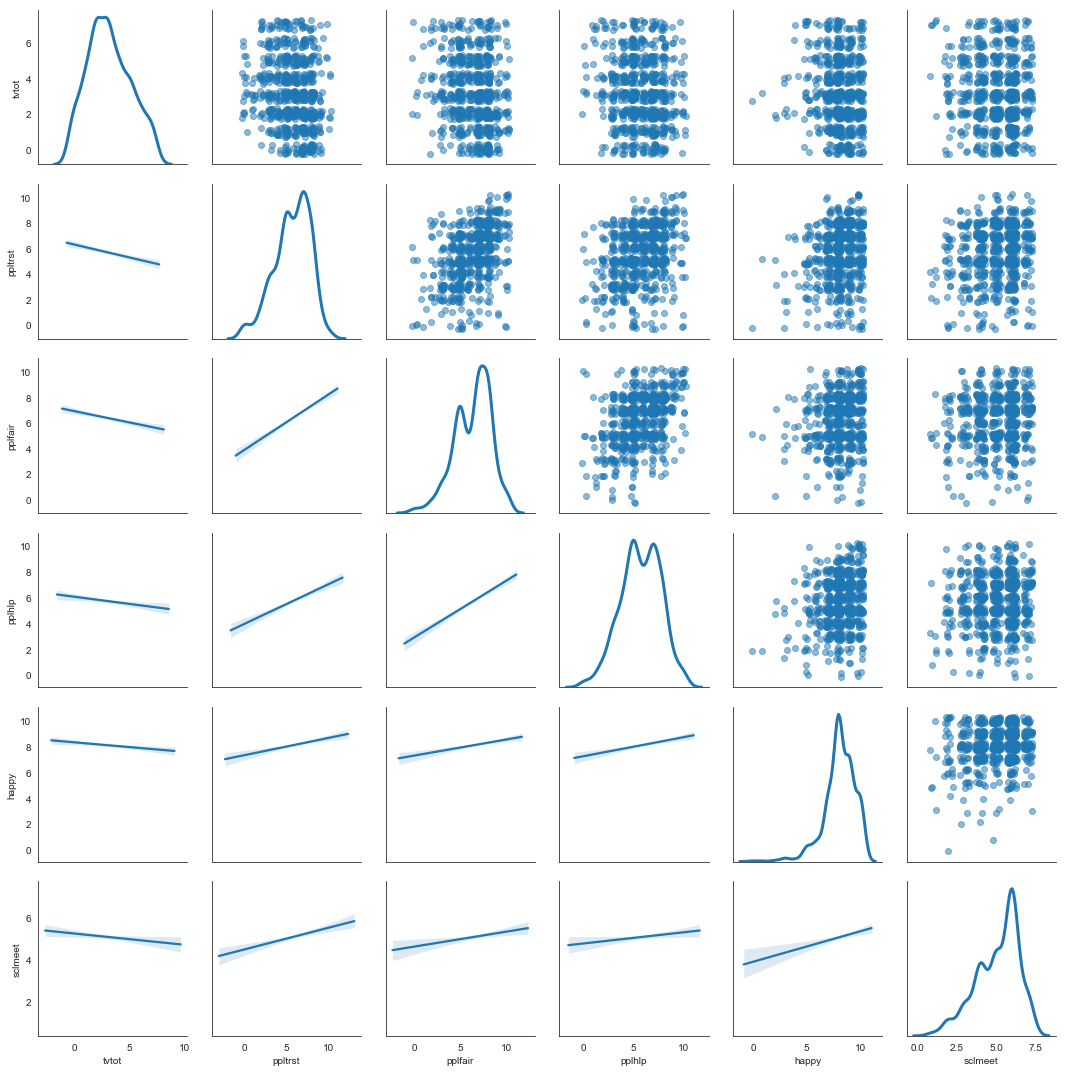

In [4]:
# The variables only take integer values between 0 and 10, 
# so points on the scatterplot will hide one another.
# To better see all the points, we create a dataframe of
# random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()

# make the random noise
jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=(df_jittered.shape)),
                      columns=df_jittered.columns
                     )

# combine the data and the noise
df_jittered = df_jittered.add(jitter)

# declare that you want to make a scatterplot matrix
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

# scatterplot
g.map_upper(plt.scatter, alpha=0.5)

# fit line summarizing the linear relationship of the two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# give information about the univariate distributions of the variables
g.map_diag(sns.kdeplot, lw=3)


plt.show()


#Some warnings will show up below because the plot does not include a legend.

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


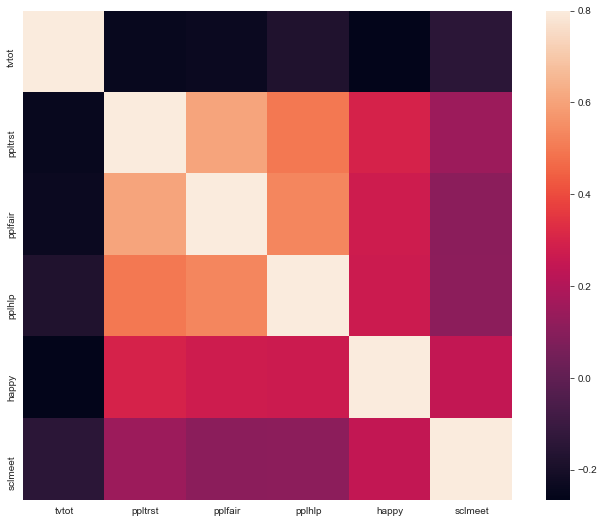

In [5]:
# make the correlaton matrix
corrmat = df_czch.corr()

print(corrmat)

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,9))

# draw heatmap using seaborn
sns.heatmap(corrmat, vmax=0.8, square=True)


plt.show()


# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

### For a continuous and a categorical pair:
- Box, violin, or similar plots estimate the value of the continuous variable for each value of the categorical variable.
- Descriptive statistics, including estimates of central tendency and variance, for the continuous variable at each level of the categorical variable.
- T-tests and ANOVA
- Look for: Outliers in each group, very small groups

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


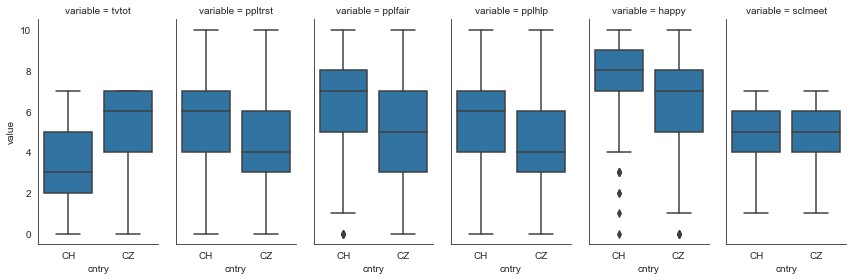

       happy                                               pplfair            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH     770.0  8.088312  1.437920  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     646.0  6.770898  2.053582  0.0  5.0  7.0  8.0  10.0   649.0  4.959938   

      ...  sclmeet       tvtot                                               
      ...      75%  max  count      mean       std  min  25%  50%  75%  max  
cntry ...                                                                    
CH    ...      6.0  7.0  772.0  3.141192  1.913706  0.0  2.0  3.0  5.0  7.0  
CZ    ...      6.0  7.0  653.0  5.142420  1.851775  0.0  4.0  6.0  7.0  7.0  

[2 rows x 48 columns]
tvtot
Ttest_indResult(statistic=19.962218108197227, pvalue=2.321576398582079e-78)
ppltrst
Ttest_indResult(statistic=-10.928900558029875, pvalue=9.394029017549828e-27)
pplfair
Ttest_indRe

In [6]:
# Plot all the variables with boxplots for each country.


# Restructure the data so we can use FacetGrid
# rather than making a boxplot for each variable separately
df_long = df_czch
df_long = pd.melt(df_long, id_vars=['cntry'])

g = sns.FacetGrid(df_long, col='variable', height=4, aspect=0.5)
g = g.map(sns.boxplot, 'cntry', 'value')


plt.show()


# descriptive stats by group
print(df_czch.groupby('cntry').describe())


# test whether group differences are significant
for col in df_czch.loc[:, 'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry'] == 'CZ'][col].dropna(),
        df_czch[df_czch['cntry'] == 'CH'][col].dropna()
    ))

In [7]:
df_long.head()

,cntry,variable,value
0,CH,tvtot,3.0
1,CH,tvtot,6.0
2,CH,tvtot,1.0
3,CH,tvtot,4.0
4,CH,tvtot,5.0


Judging by the boxplots, the 'happy' variable has some potential outliers for Switzerland that we should keep an eye on.
The two countries appear to differ significantly for all the variables measured.

### For two categorical variables:
- A barplot, with the height of each bar indicating the number of datapoints in each combination of levels of the two variables
- A table of counts, giving the number of datapoints for each combination of levels of the two variables
- Chi-square tests that indicate whether one combination of levels is significantly smaller or larger than the rest.
- Look for: Subgroups with very small counts relative to the other subgroups

In [8]:
# add a second categorical value
df_2cat = df.loc[
    ((df['cntry']  == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry', 'partner']
]

df_2cat.head()

,cntry,partner
0,CH,1.0
1,CH,1.0
2,CH,2.0
3,CH,1.0
4,CH,1.0


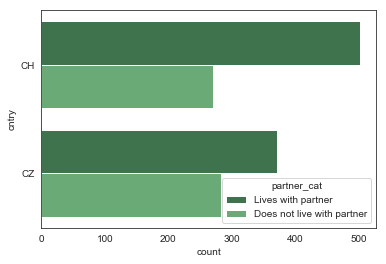

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372
Power_divergenceResult(statistic=96.39958012596222, pvalue=9.236593586645439e-21)


In [9]:
# create a text variable so output is easier to interpret 
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['partner'] == 1, 'partner_cat'] = 'Lives with partner'
df_2cat.loc[df_2cat['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

#plot counts of each combination of levels
sns.countplot(y="cntry", hue="partner_cat", data=df_2cat, palette="Greens_d")


plt.show()


# Table of counts
counttable = pd.crosstab(df_2cat['cntry'], df_2cat['partner_cat'])

print(counttable)


# Test will return a chi-square test statistic and a p-value.
# Like the t-test, the chi-square is compared against a distribution
# (the chi-square distribution) to determine whether the group size differences are
# large enough to reflect differences in the population.

print(stats.chisquare(counttable, axis=None))

It appears that in Switzerland, a higher proportion of people live with a partner than in the Czech Republic.

### Interpreting pairwise plots and statistics
These pairwise plots and statistics tell you important things:

- Which of your variables are redundant with one another, and which provide unique information. It appears that the three 'ppl' variables (trust, fairness, and helpfulness) cluster together, with correlations at or above .5. The other continuous variables are more weakly correlated and thus less redundant. The country respondents live in appears to share significant variance with all the other variables.
- Unusual two-dimensional datapoints that could skew analyses. These include outliers, subgroups with very small variance relative to other subgroups, and subgroups with very small Ns. Aside from the previously-identified potential outliers in "happy" for Switzerland, no other concerns leapt out in this overview.


### Starting to focus in
At this point, you should decide on a strategy for dealing with unusual two-dimensional datapoints.
This could include discarding the data, winsorizing, or collapsing very small or very similar subgroups into one larger category. Then it's time to move on to feature engineering.